In [2]:
import pandas as pd
import numpy as np
from numpy import isnan
from pandas import isna

from IPython.display import display

dat = pd.read_csv("all_dat.csv")
dat = dat.drop(columns=["Unnamed: 0", "CVD_Point", "cvd_risk", "cvd_class"])

display(dat.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'all_dat.csv'

# The Confusion matrix showing the final result

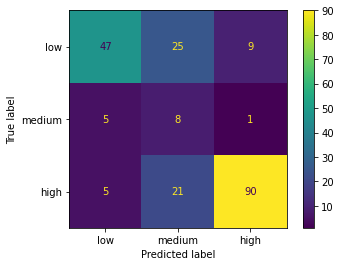

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix
import matplotlib.pyplot as plt

tmp = pd.read_csv("predict.csv")

def num_to_lab(gen):
    for l in gen:
        if l == 1:
            yield "low"
        if l == 2:
            yield "medium"
        if l == 3:
            yield "high"

        if l not in (1,2,3):
            raise Exception


ConfusionMatrixDisplay.from_predictions(
    list(num_to_lab(tmp.y_true)),
    list(num_to_lab(tmp.y_test)),
    labels=["low", "medium", "high"],
)
plt.show()


# The boxplot comparing different models

In [3]:
import matplotlib.pyplot as plt
df = pd.read_csv("tmp1.csv")

df.columns = [
    "Full feature KNN",
    "Full feature SVM",
    "Full feature RF",
    "Full feature DT",
    "Feature selected KNN",
    "Feature selected SVM",
    "Feature selected RF",
    "Feature selected DT",
]

cols = []
labels = []
for col in df:
    cols.append(df[col].to_list())
    labels.append(col)

plt.boxplot(cols, labels=labels, vert=False)
plt.xlabel("Accuracy")
plt.show()

tmp = ["Random Forest", "Decision Tree"]

f1 = pd.DataFrame(pd.read_csv("tmp2.csv").median())
f1 = f1.T
f1.columns = tmp
f1 = f1.T
f1.columns = ['F1 score']

recall = pd.DataFrame(pd.read_csv("tmp3.csv").median())
recall = recall.T
recall.columns = tmp
recall = recall.T
recall.columns = ['Recall']

acc = pd.DataFrame(pd.read_csv("tmp1.csv").median())
acc = acc.T[['boruta_rf', 'boruta_tree']]
acc.columns = tmp
acc = acc.T
acc.columns = ["Accuracy"]

pd.concat((acc, recall, f1), axis=1)

Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: 'tmp1.csv'